In [1]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [6]:
rawTrain = pd.read_csv('price_data_tr.csv')
rawVal = pd.read_csv('price_data_val.csv')
rawTest = pd.read_csv('price_data_ts.csv')

In [7]:
# KEEPING A COPY OF TRAIN AND TEST DB FOR FURTHER USAGE
trCopy =rawTrain.copy()
tsCopy = rawTest.copy()
rwCopy = rawVal.copy()

In [8]:
#breaking the date into yr, mm, day
rawTrain['date'] = pd.to_datetime(rawTrain['date'])
rawTrain['month'] = rawTrain['date'].apply(lambda date:date.month)
rawTrain['year'] = rawTrain['date'].apply(lambda date:date.year)

rawTest['date']=pd.to_datetime(rawTest['date'])
rawTest['month'] = rawTest['date'].apply(lambda date:date.month)
rawTest['year'] = rawTest['date'].apply(lambda date:date.year)

rawVal['date']=pd.to_datetime(rawVal['date'])
rawVal['month'] = rawVal['date'].apply(lambda date:date.month)
rawVal['year'] = rawVal['date'].apply(lambda date:date.year)

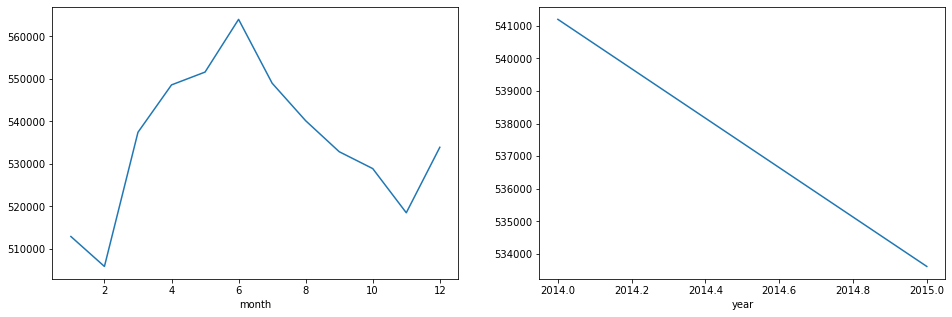

In [9]:
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
rawTrain.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
rawTrain.groupby('year').mean()['price'].plot()

In [10]:
train = rawTrain.drop(['id', 'date'], axis=1)
val = rawVal.drop(['id', 'date'], axis=1)
test = rawTest.drop(['id','date'], axis=1)

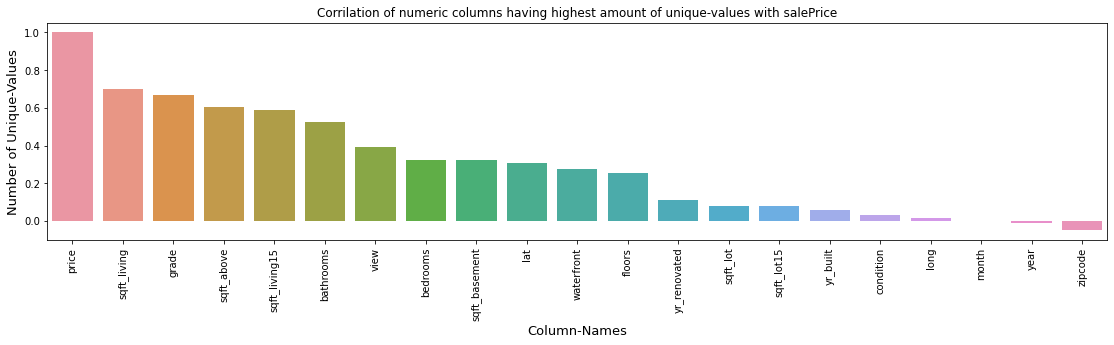

In [11]:
# CHECKING CORRELATION OF THE SELECTED COLUMNS WITH SALEPRICE
#highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 65].index)
#droping columns with unique values less than 65

#cols = highly_unique_columns['Column-Names']
cols = train.columns.values.tolist()
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['price'])))    # .corr is for finding correlation coefficient
    
    '''
    Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
    Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
    '''
    
# MAKING A DATAFRAME TO STORE THE CORRELATIONS     
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)

# VISUALIZING CORRELATIONS GRAPHICALLY
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('Corrilation of numeric columns having highest amount of unique-values with salePrice')
plt.show()

In [12]:
train_y = train['price']
train_x = train.drop(['price'], axis=1)

test_y = test['price']
test_x = test.drop(['price'], axis=1)

val_y = val['price']
val_x = val.drop(['price'], axis=1)

In [13]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
train_x = s_scaler.fit_transform(train_x.astype(np.float))
val_x = s_scaler.transform(val_x.astype(np.float))
test_x = s_scaler.transform(test_x.astype(np.float))

In [14]:
#log scale
train_y = np.log1p(train_y)
test_y = np.log1p(test_y)
val_y = np.log1p(val_y)

In [17]:
len(train_x[0])
# so we have 20 features

20

In [20]:
# having 20 neuron is based on the number of available features
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [21]:
# training for 400 epoch
model.fit(x=train_x,y=train_y,
          validation_data=(val_x,val_y),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
102/102 [==============================] - 1s 3ms/step - loss: 111.7270 - val_loss: 20.7113
Epoch 2/400
102/102 [==============================] - 0s 2ms/step - loss: 10.5750 - val_loss: 6.2736
Epoch 3/400
102/102 [==============================] - 0s 2ms/step - loss: 4.0263 - val_loss: 3.7409
Epoch 4/400
102/102 [==============================] - 0s 2ms/step - loss: 2.5762 - val_loss: 2.8030
Epoch 5/400
102/102 [==============================] - 0s 2ms/step - loss: 1.9407 - val_loss: 2.2128
Epoch 6/400
102/102 [==============================] - 0s 2ms/step - loss: 1.5406 - val_loss: 1.7930
Epoch 7/400
102/102 [==============================] - 0s 2ms/step - loss: 1.2319 - val_loss: 1.4749
Epoch 8/400
102/102 [==============================] - 0s 2ms/step - loss: 0.9876 - val_loss: 1.1984
Epoch 9/400
102/102 [==============================] - 0s 2ms/step - loss: 0.7871 - val_loss: 0.9631
Epoch 10/400
102/102 [==============================] - 0s 2ms/step - loss: 0.6120 - va

Epoch 161/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.0642
Epoch 162/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0588
Epoch 163/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.0588
Epoch 164/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0595
Epoch 165/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.0611
Epoch 166/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.0608
Epoch 167/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0620
Epoch 168/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.0637
Epoch 169/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.0623
Epoch 170/400
102/102 [==============================] - 0s 2ms/step - lo

102/102 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0538
Epoch 320/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0575
Epoch 321/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0274 - val_loss: 0.0536
Epoch 322/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0274 - val_loss: 0.0560
Epoch 323/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0537
Epoch 324/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0526
Epoch 325/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.0530
Epoch 326/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.0588
Epoch 327/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0275 - val_loss: 0.0536
Epoch 328/400
102/102 [==============================] - 0s 2ms/step - loss: 0.0266 - v

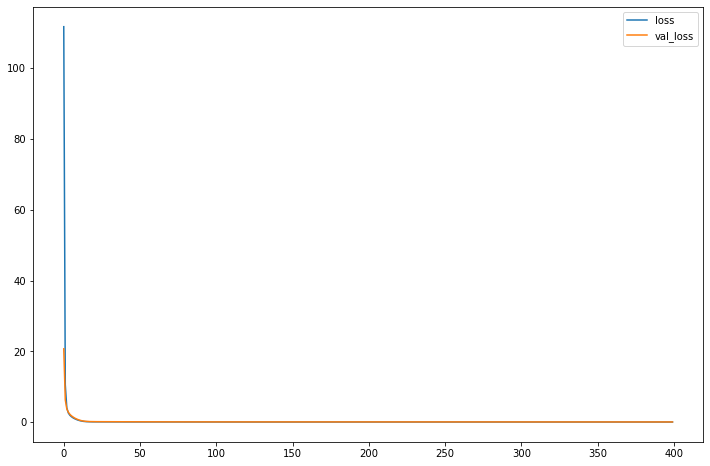

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

# Evaluation on dataset

In [29]:
y_pred_test = np.exp(model.predict(test_x))-1

MAE: 0.13547087680323727
MSE: 0.048945732084095674
RMSE: 0.22123682352649993
VarScore: 0.8304035966618366


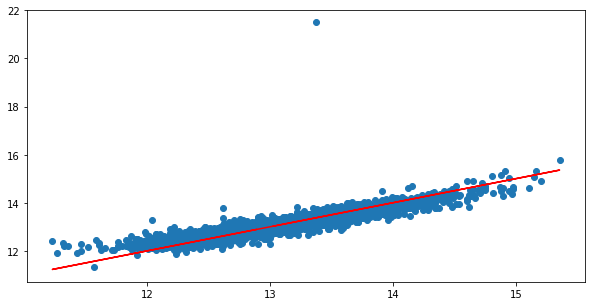

In [25]:
# using validation dataset
y_pred = model.predict(val_x)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(val_y, y_pred))  
print('MSE:', metrics.mean_squared_error(val_y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(val_y, y_pred)))
print('VarScore:',metrics.explained_variance_score(val_y, y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(val_y, y_pred)
# Perfect predictions
plt.plot(val_y, val_y,'r')

In [34]:
val_y, y_pred

(0       13.024753
 1       13.142168
 2       12.847666
 3       12.736704
 4       12.519061
           ...    
 4318    12.594734
 4319    13.345509
 4320    12.929994
 4321    13.296318
 4322    12.886644
 Name: price, Length: 4323, dtype: float64,
 array([[12.91431 ],
        [13.159382],
        [12.863766],
        ...,
        [13.037995],
        [13.227405],
        [13.053766]], dtype=float32))

In [30]:
res_col = ['id', 'price']
res_df = pd.DataFrame(tsCopy, columns=res_col)
res_df['id'], res_df['price'] = tsCopy['id'], y_pred_test
res_df['id']= res_df['id'].astype(str).str.zfill(10)
res_df['price']= res_df['price'].round()
res_df['id'] = res_df['id'].astype(str)+tsCopy['date'].astype(str)
res_df.to_csv('kaggleRegression.csv', index=False)